<a href="https://colab.research.google.com/github/sathamhussain7/ML-algorithms/blob/main/KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMeans clustering**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/faithful.csv')
df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [ ]:
df.shape

(272, 3)

In [ ]:
df.dtypes

Unnamed: 0      int64
eruptions     float64
waiting         int64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0    0
eruptions     0
waiting       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [ ]:
feature=['eruptions',	'waiting']
for i in feature:
 iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
 upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
 lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)

 print('feature:',i)
 print('iqr :',iqr)
 print('upper_threshold : ',upper_threshold)
 print('lower_threshold :',lower_threshold)
 
 if upper_threshold > df[i].max():
  print('No outlier in upper_threshold ')
 else:
  print('outlier in upper_threshold')
 if lower_threshold< df[i].min():
   print('No outlier in lower_threshold ')
 else:
  print('outlier in lower_threshold')
 print()

feature: eruptions
iqr : 2.2915
upper_threshold :  7.891500000000001
lower_threshold : -1.2745000000000002
No outlier in upper_threshold 
No outlier in lower_threshold 

feature: waiting
iqr : 24.0
upper_threshold :  118.0
lower_threshold : 22.0
No outlier in upper_threshold 
No outlier in lower_threshold 



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

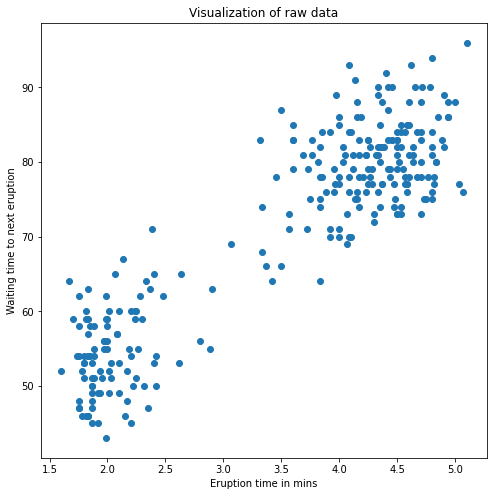

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
X_std=scaler.transform(df)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(X_std)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
centroids=km.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

In [ ]:
km.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
km.inertia_

79.575959488277

Text(0.5, 1.0, 'Visualization of clustered data')

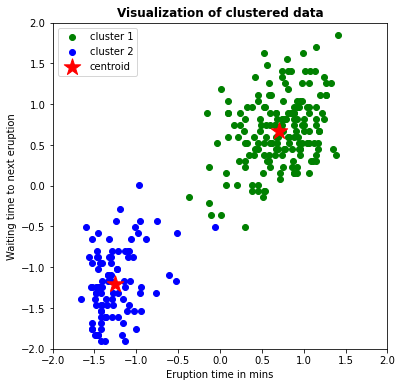

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


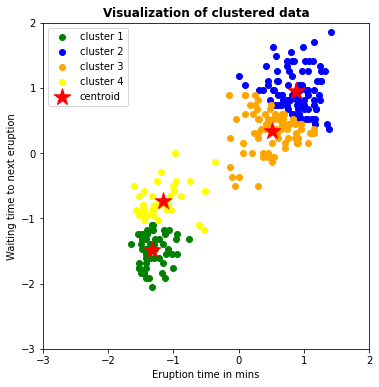

In [ ]:
km = KMeans(n_clusters=4) # k = 4
km.fit(X_std)
centroids = km.cluster_centers_
#centroids
km.inertia_ # measures how tight my clusters are -> lower the better (lower => the clusters are more tight)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

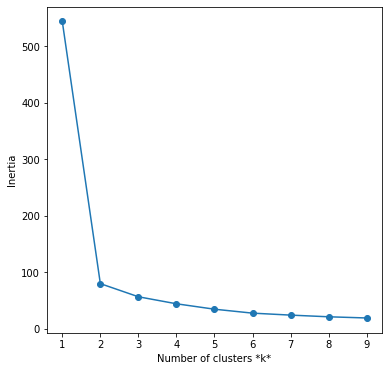

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

Drawbacks: learn spherical pattern only